<a href="https://colab.research.google.com/github/hchang18/non-parametric-methods/blob/main/non_parametric_testing_two_dists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nonparametric testing on two distributions
### STAT 580 Non parametric methods (Spring 2021) 
### Homework 5

Haeyoon Chang

**Overall takeaway** The testing results depended on size of random samples and random samples themselves from each distribution. My expectation was that null hypotheses would be rejected as long as the sample size $>20$. However, the null hypothesis was rejected and sometimes not rejected despite the sample size bigger than 20. I think it would be worthwhile to use bootstrap methods to run multiple experiments (at the expense of computation) instead of just one experiment. Please see below for the analysis on each of questions below. 

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, wilcoxon, zscore

np.random.seed(1)

1. Generate $N(0.2, 1)$ and $N(0.5, 1)$ independently for two samples, $X$ and $Y$, respectively. Test whether the medians of two samples are the same using proper method. Analyze your results.

    **Approach**  Although Mann-Whitney U test and Wilcoxon test are both nonparametric and involves summation of ranks, Wilcoxon two sample (signed rank) test is applied to matched or dependent samples while Mann-Whitney is applied to independent samples. The assumptions here are 1) two samples are independent from each other and 2) two samples have same variance. Therefore, I am using Mann Whitney U test. 

    Null hypothesis was rejected with 30 and 40 data points from X and Y respectively.  

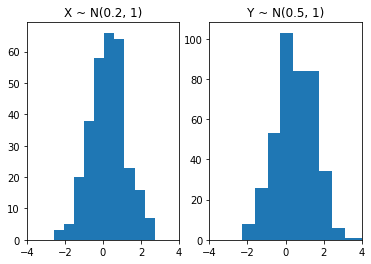

In [2]:
# Generate X from N(0.2, 1) and Y from N(0.5, 1)
m = 300 # number of Xs
n = 400 # number of Ys
X = np.random.normal(0.2, 1, size=m)
Y = np.random.normal(0.5, 1, size=n)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X)
ax1.set_title("X ~ N(0.2, 1)")
ax1.set_xlim([-4, 4])
ax2.hist(Y)
ax2.set_title("Y ~ N(0.5, 1)")
ax2.set_xlim([-4, 4])
fig.show()

In [3]:
# Pool in one 
X_set = set(X)
Y_set = set(Y)
S = np.union1d(X, Y)
N = m + n

U = 0
for x in X:
    for y in Y:
        if x < y:
            U += 1

E_u = m * n / 2
var_u = m * n * (m + n + 1) / 12

z = (U - E_u) / np.sqrt(var_u)

In [4]:
if (z > 1.95 or z < - 1.95):
    print("Reject H0 (medians of two distributions are the same)")
else:
    print("Cannot reject H0 (medians of two distributions are the same)")

Reject H0 (medians of two distributions are the same)


2. Generate $N(0.2, 0.5)$ and $N(0.5, 1)$ independently for two samples, $X$ and $Y$, respectively. Test whether the medians of two samples are the same using proper method. Analyze your results.

    **Approach** Fligner-Policello test since we want no assumption on shape or scale of the distribution. (two different symmetric distributions)

    Null hypothesis was rejected with 30 and 40 data points from X and Y respectively.  

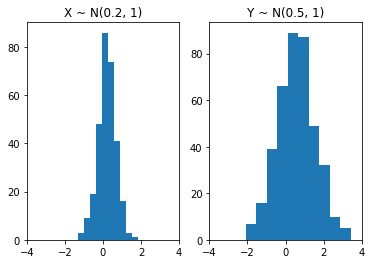

In [5]:
# Generate X from N(0.2, 0.5) and Y from N(0.5, 1)
m = 300 # number of Xs
n = 400 # number of Ys
X = np.random.normal(0.2, 0.5, size=m)
Y = np.random.normal(0.5, 1, size=n)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X)
ax1.set_title("X ~ N(0.2, 1)")
ax1.set_xlim([-4, 4])
ax2.hist(Y)
ax2.set_title("Y ~ N(0.5, 1)")
ax2.set_xlim([-4, 4])
fig.show()

In [6]:
# Pool in one 
X_set = set(X)
Y_set = set(Y)
S = np.union1d(X, Y)
N = m + n

P_i = []
for x in X:
    count = 0
    for y in Y:
        if y <= x:
            count += 1
    P_i.append(count)

Q_j = []
for y in Y:
    count = 0
    for x in X:
        if x <= y:
            count += 1
    Q_j.append(count)

P_i = np.array(P_i)
Q_j = np.array(Q_j)
P_bar = np.average(P_i)
Q_bar = np.average(Q_j)
V1 = sum((P_i - P_bar)**2)
V2 = sum((Q_j - Q_bar)**2)
U_hat = (sum(Q_j) - sum(P_i))/(2 * np.sqrt(V1 + V2 + P_bar * Q_bar))

In [7]:
if (U_hat > 1.95 or U_hat < - 1.95):
    print("Reject H0 (medians of two distributions are the same)")
else:
    print("Cannot reject H0 (medians of two distributions are the same)")

Reject H0 (medians of two distributions are the same)


3. Generate $N(0, 1)$ and $N(0, 0.8)$ independently for two samples, $X$ and $Y$, respectively. Test whether the variances of two samples are the same using proper melthods. Analyze your results.

    **Approach** First two-sample-dispersion test can be used in this case since medians are assumed to be same for two distributions

    $H_0 : \gamma^2 = \frac{var(X)}{var(Y)} = 1 $ 

    Null hypothesis was rejected with 100 and 101 data points from X and Y respectively. 

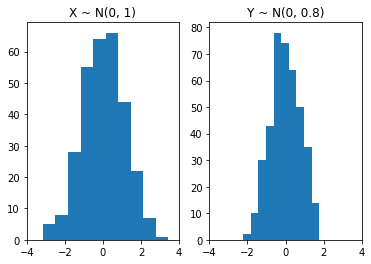

In [8]:
# Generate X from N(0, 1) and Y from N(0, 0.8)
m = 300 # number of Xs
n = 400 # number of Ys
X = np.random.normal(0, 1, size=m)
Y = np.random.normal(0, 0.8, size=n)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X)
ax1.set_title("X ~ N(0, 1)")
ax1.set_xlim([-4, 4])
ax2.hist(Y)
ax2.set_title("Y ~ N(0, 0.8)")
ax2.set_xlim([-4, 4])
fig.show()

In [9]:
# Pool in one 
X_set = set(X)
Y_set = set(Y)
S = np.union1d(X, Y)
N = m + n

# N is odd 
if N % 2 == 1:
    print("N odd")
    # create the grid 
    grid = [i+1 for i in range(int(N/2))]
    reversed_grid = grid[::-1]
    middle = [int((N+1)/2)]
    R = grid + middle + reversed_grid
    S.sort()

    # calculate C
    C = 0
    for k in range(N):
        if S[k] in Y_set:
            C += R[k]

    E_c = (n * (N+1)**2) / (4*N)
    var_c = n * (N-n) * (N+1) * (N**2 + 3) / (48 * N**2)

    Q = (C - E_c) / np.sqrt(var_c)
else:
    print("N even")

    grid = [i+1 for i in range(int(N/2))]
    reversed_grid = grid[::-1]
    R = grid + reversed_grid
    S.sort()

    # calculate C
    C = 0
    for i in range(N):
        if S[i] in Y_set:
            C += R[i]

    E_c = n * (N+2) / 4
    var_c = n * (N-n) * (N+2) * (N-2) / (48*(N-1))

    Q = (C - E_c) / np.sqrt(var_c)

N even


In [10]:
if (Q > 1.95 or Q < - 1.95):
    print("Reject H0 (variances of two distributions are the same)")
else:
    print("Cannot reject H0 (variances of two distributions are the same)")

Reject H0 (variances of two distributions are the same)


4. Generate $N(0.5, 1)$ and $N(0, 0.9)$ independently for two samples, $X$ and $Y$, respectively. Test whether the variances of two samples are the same using proper melthods. Analyze your results.

    **Approach** We have to relax the assumption on the same medians, use the second test statistics

    $H_0 : \gamma^2 = \frac{var(X)}{var(Y)} = 1 $ 

    Null hypothesis was rejected with 20 and 15 data points from X and Y respectively. 

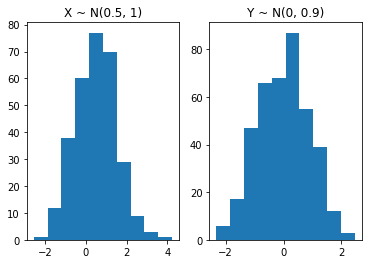

In [11]:
# Generate X from N(0.5, 1) and Y from N(0, 0.9)
m = 300 # number of Xs
n = 400 # number of Ys
X = np.random.normal(0.5, 1, size=m)
Y = np.random.normal(0, 0.9, size=n)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(X)
ax1.set_title("X ~ N(0.5, 1)")
ax2.hist(Y)
ax2.set_title("Y ~ N(0, 0.9)")
fig.show()

In [12]:
# Test Procedure 
X_sum = np.full(m, sum(X))
X_s = X_sum - X
X_i_bar = X_s / (m - 1) 
D_i = (X_s - X_i_bar)**2 / (m - 2)

Y_sum = np.full(n, sum(Y))
Y_s = Y_sum - Y
Y_j_bar = Y_s / (n - 1)
E_j = (Y_s - Y_j_bar) ** 2 / (n - 2)

X_0_bar = sum(X) / m
D_0 = sum((X - X_0_bar)**2 / (m-1))

Y_0_bar = sum(Y) / n
E_0 = sum((Y - Y_0_bar)**2 / (n-1))

S_i = np.log(D_i)
T_j = np.log(E_j)
S_0 = np.log(D_0)
T_0 = np.log(E_0)

A_i = m * S_0 - (m - 1) * S_i
B_j = n * T_0 - (n - 1) * T_j

A_bar = sum(A_i) / m
B_bar = sum(B_j) / n

V1 = 1 / (m*(m-1)) * sum((A_i - A_bar)**2)
V2 = 1 / (n*(n-1)) * sum((B_j - B_bar)**2)

Q = (A_bar - B_bar) / np.sqrt(V1 + V2)
print(f"Q: {Q}")



Q: -85.2531520049371


In [13]:
if (Q > 1.95 or Q < - 1.95):
    print("Reject H0 (variances of two distributions are the same)")
else:
    print("Cannot reject H0 (variances of two distributions are the same)")

Reject H0 (variances of two distributions are the same)
